In [3]:
import mediapipe as mp
import cv2
import numpy as np

In [4]:
dir(mp)

['CalculatorGraph',
 'GraphInputStreamAddMode',
 'Image',
 'ImageFormat',
 'ImageFrame',
 'Matrix',
 'Packet',
 'Timestamp',
 'ValidatedGraphConfig',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'calculators',
 'packet_creator',
 'packet_getter',
 'resource_util',
 'solutions',
 'tasks']

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [6]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Initially set finger count to 0 for each cap
    fingerCount = 0

    if results.multi_hand_landmarks:

      for hand_landmarks in results.multi_hand_landmarks:
        # Get hand index to check label (left or right)
        handIndex = results.multi_hand_landmarks.index(hand_landmarks)
        handLabel = results.multi_handedness[handIndex].classification[0].label

        # Set variable to keep landmarks positions (x and y)
        handLandmarks = []

        # Fill list with x and y positions of each landmark
        for landmarks in hand_landmarks.landmark:
          handLandmarks.append([landmarks.x, landmarks.y])

        # Draw hand landmarks 
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

    # Display finger count
    cv2.putText(image, str(fingerCount), (50, 450), cv2.FONT_HERSHEY_SIMPLEX, 3, (255, 0, 0), 10)

    # Display image
    cv2.imshow('MediaPipe Hands', image)
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

In [1]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


cap = cv2.VideoCapture(0)

with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
              # If loading a video, use 'break' instead of 'continue'.
            break
            
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # process image
        results = pose.process(image)

        # draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Display image
        cv2.imshow('MediaPipe Pose', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()

NameError: name 'mp' is not defined

# Video MediaPipe Pose

In [16]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


videoLocation = 'D:/Thesis/Video-Auslan-sorted/CLOTHES/'
videoName = 'CLOTHES_MTFB2c7a_41250_41710.mp4'
saveLocation = 'D:/Thesis'

coordinates = []

print('opening: ' + videoLocation + videoName)
vid = cv2.VideoCapture(videoLocation + videoName)

if (vid.isOpened()== False): 
    print("Error opening video stream or file")
frames = 0
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while vid.isOpened():
        success, image = vid.read()
        frames += 1
        if not success:
            print("Ignoring empty camera frame.")
            break
        image_height, image_width, _ = image.shape
            
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        if not results.pose_landmarks:
            print("no land marks this frame")
            continue
        else:
            coordinates.append(results.pose_landmarks.landmark)
        
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # process image
        results = pose.process(image)
        results

        # draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Display image
        cv2.imshow('MediaPipe Pose', image)
        if cv2.waitKey(5) & 0xFF == 27:
            break
coordinates = np.array(coordinates)
print('number of frames: ', frames)

print(coordinates.shape)
print(coordinates)
vid.release()

cv2.destroyAllWindows()

opening: D:/Thesis/Video-Auslan-sorted/CLOTHES/CLOTHES_MTFB2c7a_41250_41710.mp4
Ignoring empty camera frame.
number of frames:  12
(11, 33)
[[x: 0.5607534646987915
  y: 0.296958863735199
  z: -0.650275468826294
  visibility: 0.9997729659080505 x: 0.568696141242981
                                 y: 0.2635289430618286
                                 z: -0.6076226830482483
                                 visibility: 0.9996441602706909
  x: 0.5770906805992126
  y: 0.264620304107666
  z: -0.6076786518096924
  visibility: 0.9995691180229187 x: 0.5848612189292908
                                 y: 0.2662404775619507
                                 z: -0.6075906157493591
                                 visibility: 0.9996427297592163
  x: 0.5400281548500061
  y: 0.25879228115081787
  z: -0.6124223470687866
  visibility: 0.9996447563171387 x: 0.5263216495513916
                                 y: 0.2575545310974121
                                 z: -0.6123030781745911
                  

## Optical flow

In [8]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


videoLocation = 'D:/BOBSL/BOBSL200G/bobsl/videos/'
videoName = '6242043045785611181.mp4'
saveLocation = 'D:/Thesis'

coordinates = []

print('opening: ' + videoLocation + videoName)
vid = cv2.VideoCapture(videoLocation + videoName)
if (vid.isOpened()== False): 
    print("Error opening video stream or file")

success, image = vid.read()

prev_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(image)

mask[..., 1] = 255

while vid.isOpened():

    success, image = vid.read()

    if not success:
        print("Ignoring empty camera frame.")
        break
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    mask[..., 0] = angle * 180 / np.pi / 2
      
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv2.imshow("dense optical flow", rgb)
    # Updates previous frame
    prev_gray = gray
    if cv2.waitKey(5) & 0xFF == 27:
        break
vid.release()
cv2.destroyAllWindows()

opening: D:/BOBSL/BOBSL200G/bobsl/videos/6242043045785611181.mp4


# Animate the coordinates

### from https://matplotlib.org/2.1.2/gallery/animation/simple_3danim.html

In [25]:
%matplotlib notebook

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation
import pandas as pd

In [7]:
len(coordinates)

103

In [ ]:
f1 = open("results.txt", "w")
for vari in dir(results.pose_landmarks.landmark):
    f1.write(str(vari) + '\n')
f1.close()

In [17]:
# print(coordinates.shape)
coor = []
for frame in coordinates:
    coorFrame = []
    for landmarks in frame:
        coorFrame.append((landmarks.x * -1, landmarks.y * -1, landmarks.z * -1))
    coor.append(coorFrame)
coor = np.array(coor)

connections = set(mp_pose.POSE_CONNECTIONS)

In [46]:
def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    x = data[iteration][0]
    y = data[iteration][1]
    z = data[iteration][2]
    scatters._offsets3d = (x, y, z)
    return scatters

In [19]:
connect

NameError: name 'connect' is not defined

In [13]:
import os
Y = []
X = []
coorDataLocation = "D:/Thesis/ELAR-Data/arrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if 'shape' in data:
        continue
    fileLocation = coorDataLocation + data
    shapeLocation = coorDataLocation + dirData[i+1]
    coorLoad = np.loadtxt(fileLocation)
    coorShape= np.loadtxt(shapeLocation)
    coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    break
    X.append(coorLoad)
    Y.append(labelDict[data.split('_')[0]])

<IPython.core.display.Javascript object>


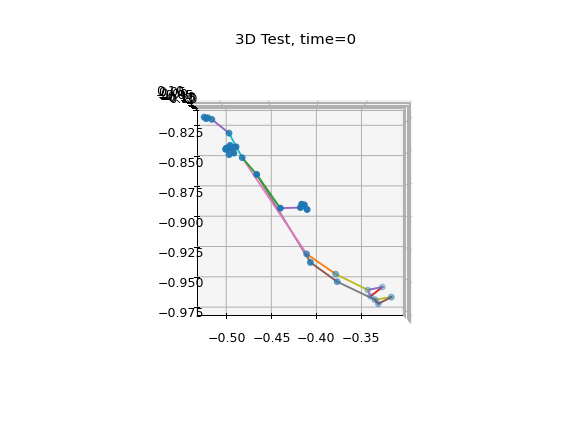

In [18]:
data = coorLoad
connect = connections

def updateGraph(num):
    x = data[num].T[0]
    y = data[num].T[1]
    z = data[num].T[2]
    graph._offsets3d = (x, y, z)
    title.set_text('3D Test, time={}'.format(num))
    createLines(num)

def createLines(num):
    numPoints = data[0].shape[0]
    for i, (p1, p2) in enumerate(connect):
        line = lines[i]
        if p1 >= numPoints or p2>= numPoints:
            break
        line.set_data([[data[num, p1, 0], data[num, p2, 0]], 
                      [data[num, p1, 1], data[num, p2, 1]]])
        line.set_3d_properties([data[num, p1, 2], data[num, p2, 2]])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
ax.view_init(90, -90)

x = data[0].T[0]
y = data[0].T[1]
z = data[0].T[2]
graph = ax.scatter(x, y, z)
lines = [ax.plot([], [], [])[0] for _ in connect]


# dir(lines)
ani = matplotlib.animation.FuncAnimation(fig, updateGraph, len(data), 
                               interval=100, blit=False)

plt.show()

## Stuff

In [43]:
import pandas as pd
import plotly.graph_objects as go

import cv2
import math
import numpy as np
import plotly.express as px
from pathlib import Path
import mediapipe as mp

_PRESENCE_THRESHOLD = 0.5
_VISIBILITY_THRESHOLD = 0.5


def plot_landmarks(
    landmark_list,
    connections=None,
):
    if not landmark_list:
        return
    plotted_landmarks = {}
    for idx, landmark in enumerate(landmark_list.landmark):
        if (
            landmark.HasField("visibility")
            and landmark.visibility < _VISIBILITY_THRESHOLD
        ) or (
            landmark.HasField("presence") and landmark.presence < _PRESENCE_THRESHOLD
        ):
            continue
        plotted_landmarks[idx] = (-landmark.z, landmark.x, -landmark.y)
    if connections:
        out_cn = []
        num_landmarks = len(landmark_list.landmark)
        # Draws the connections if the start and end landmarks are both visible.
        for connection in connections:
            start_idx = connection[0]
            end_idx = connection[1]
            if not (0 <= start_idx < num_landmarks and 0 <= end_idx < num_landmarks):
                raise ValueError(
                    f"Landmark index is out of range. Invalid connection "
                    f"from landmark #{start_idx} to landmark #{end_idx}."
                )
            if start_idx in plotted_landmarks and end_idx in plotted_landmarks:
                landmark_pair = [
                    plotted_landmarks[start_idx],
                    plotted_landmarks[end_idx],
                ]
                out_cn.append(
                    dict(
                        xs=[landmark_pair[0][0], landmark_pair[1][0]],
                        ys=[landmark_pair[0][1], landmark_pair[1][1]],
                        zs=[landmark_pair[0][2], landmark_pair[1][2]],
                    )
                )
        cn2 = {"xs": [], "ys": [], "zs": []}
        for pair in out_cn:
            for k in pair.keys():
                cn2[k].append(pair[k][0])
                cn2[k].append(pair[k][1])
                cn2[k].append(None)

    df = pd.DataFrame(plotted_landmarks).T.rename(columns={0: "z", 1: "x", 2: "y"})
    df["lm"] = df.index.map(lambda s: mp_pose.PoseLandmark(s).name).values
    fig = (
        px.scatter_3d(df, x="z", y="x", z="y", hover_name="lm")
        .update_traces(marker={"color": "red"})
        .update_layout(
            margin={"l": 0, "r": 0, "t": 0, "b": 0},
            scene={"camera": {"eye": {"x": 2.1, "y": 0, "z": 0}}},
        )
    )
    fig.add_traces(
        [
            go.Scatter3d(
                x=cn2["xs"],
                y=cn2["ys"],
                z=cn2["zs"],
                mode="lines",
                line={"color": "black", "width": 5},
                name="connections",
            )
        ]
    )

    return fig

In [30]:
plot_landmarks(
        results.pose_world_landmarks,  mp_pose.POSE_CONNECTIONS)

NameError: name 'plot_landmarks' is not defined

In [20]:
mp_pose.POSE_CONNECTIONS


frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

## Seminar video creation

In [11]:
# initialize Pose estimator
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


videoLocation = 'D:/Thesis/Video-Auslan-sorted/CLOTHES/'
videoName = 'CLOTHES_MTFB2c7a_41250_41710.mp4'
saveLocation = 'D:/Thesis/Seminar'

coordinates = []

print('opening: ' + videoLocation + videoName)
vid = cv2.VideoCapture(videoLocation + videoName)

if (vid.isOpened()== False): 
    print("Error opening video stream or file")

size = (int(vid.get(3)), int(vid.get(4)))

writer = cv2.VideoWriter(saveLocation + '/' + 'seminar.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 25, size)

frames = 0
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
    while vid.isOpened():
        success, image = vid.read()
        frames += 1
        if not success:
            print("Ignoring empty camera frame.")
            break
        image_height, image_width, _ = image.shape
            
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        if not results.pose_landmarks:
            print("no land marks this frame")
            continue
        else:
            coordinates.append(results.pose_landmarks.landmark)
        
        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # process image
        results = pose.process(image)

        # draw landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Display image
        cv2.imshow('MediaPipe Pose', image)
        
        # Write image
        writer.write(image)
        
        if cv2.waitKey(5) & 0xFF == 27:
            break
vid.release()
writer.release()
cv2.destroyAllWindows()

coordinates = np.array(coordinates)
print('number of frames: ', frames)

print(coordinates.shape)
print(coordinates)


opening: D:/Thesis/Video-Auslan-sorted/CLOTHES/CLOTHES_MTFB2c7a_41250_41710.mp4
Ignoring empty camera frame.
number of frames:  12
(11, 33)
[[x: 0.5607534646987915
  y: 0.296958863735199
  z: -0.650275468826294
  visibility: 0.9997729659080505 x: 0.568696141242981
                                 y: 0.2635289430618286
                                 z: -0.6076226830482483
                                 visibility: 0.9996441602706909
  x: 0.5770906805992126
  y: 0.264620304107666
  z: -0.6076786518096924
  visibility: 0.9995691180229187 x: 0.5848612189292908
                                 y: 0.2662404775619507
                                 z: -0.6075906157493591
                                 visibility: 0.9996427297592163
  x: 0.5400281548500061
  y: 0.25879228115081787
  z: -0.6124223470687866
  visibility: 0.9996447563171387 x: 0.5263216495513916
                                 y: 0.2575545310974121
                                 z: -0.6123030781745911
                  

In [12]:
videoLocation = 'D:/Thesis/Video-Auslan-sorted/CLOTHES/'
videoName = 'CLOTHES_MTFB2c7a_41250_41710.mp4'
saveLocation = 'D:/Thesis/Seminar'


coordinates = []

print('opening: ' + videoLocation + videoName)
vid = cv2.VideoCapture(videoLocation + videoName)

if (vid.isOpened()== False): 
    print("Error opening video stream or file")

size = (int(vid.get(3)), int(vid.get(4)))
fps = vid.get(cv2.CAP_PROP_FPS)
writer = cv2.VideoWriter(saveLocation + '/' + 'seminar-optical.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, size)
success, image = vid.read()

prev_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(image)

mask[..., 1] = 255

while vid.isOpened():

    success, image = vid.read()

    if not success:
        print("Ignoring empty camera frame.")
        break
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    mask[..., 0] = angle * 180 / np.pi / 2
      
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    
    # write image
    writer.write(rgb)
    
    # Opens a new window and displays the output frame
    cv2.imshow("dense optical flow", rgb)
    # Updates previous frame
    prev_gray = gray
    if cv2.waitKey(5) & 0xFF == 27:
        break
vid.release()
writer.release()
cv2.destroyAllWindows()

opening: D:/Thesis/Video-Auslan-sorted/CLOTHES/CLOTHES_MTFB2c7a_41250_41710.mp4
Ignoring empty camera frame.


In [21]:
import os
coorDataLocation = "D:/Thesis/ELAR-Data/arrayData/CLOTHES_MTFB2c7a_41250_41710.npy"
coorShapeLocation = "D:/Thesis/ELAR-Data/arrayData/CLOTHES_MTFB2c7a_41250_41710_shape.npy"
coorLoad = np.loadtxt(coorDataLocation)
coorShape= np.loadtxt(coorShapeLocation)
coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))

<IPython.core.display.Javascript object>


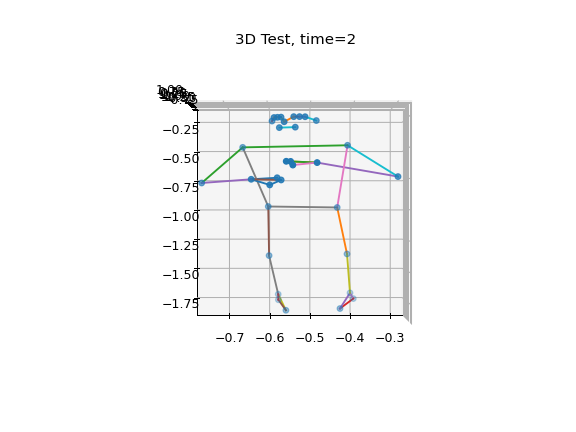

In [29]:
data = coorLoad
connect = connections

def updateGraph(num):
    x = data[num].T[0]
    y = data[num].T[1]
    z = data[num].T[2]
    graph._offsets3d = (x, y, z)
    title.set_text('3D Test, time={}'.format(num))
    createLines(num)

def createLines(num):
    numPoints = data[0].shape[0]
    for i, (p1, p2) in enumerate(connect):
        line = lines[i]
        if p1 >= numPoints or p2>= numPoints:
            break
        line.set_data([[data[num, p1, 0], data[num, p2, 0]], 
                      [data[num, p1, 1], data[num, p2, 1]]])
        line.set_3d_properties([data[num, p1, 2], data[num, p2, 2]])
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
ax.view_init(90, -90)

x = data[0].T[0]
y = data[0].T[1]
z = data[0].T[2]
graph = ax.scatter(x, y, z)
lines = [ax.plot([], [], [])[0] for _ in connect]


# dir(lines)
ani = matplotlib.animation.FuncAnimation(fig, updateGraph, len(data), 
                               interval=100, blit=False)

plt.show()

## Destroy page

In [15]:
cv2.destroyAllWindows()